# CSCI 3022: Intro to Data Science - Fall 2021 Coding Exam 1
***

This practicum is due on Canvas by **6:00 PM on Friday October 8**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  

**Here are the rules:** 

1. All work, code and analysis, must be your own. 
1. You may use your course notes, posted lecture slides, textbooks, in-class notebooks, and homework solutions as resources.  You may also search online for answers to general knowledge questions like the form of a probability distribution function or how to perform a particular operation in Python/Pandas. 
1. This is meant to be like a coding portion of your midterm exam. So, the instructional team will be much less helpful than we typically are with homework. For example, we will not check answers, help debug your code, and so on.
1. If something is left open-ended, it is because we want to see how you approach the kinds of problems you will encounter in the wild, where it will not always be clear what sort of tests/methods should be applied. Feel free to ask clarifying questions though.
2. You may **NOT** post to message boards or other online resources asking for help.
3. You may **NOT** copy-paste solutions *from anywhere*.
4. You may **NOT** collaborate with classmates or anyone else.
5. In short, **your work must be your own**. It really is that simple.

Violation of the above rules will result in an immediate academic sanction (*at the very least*, you will receive a 0 on this practicum or an F in the course, depending on severity), and a trip to the Honor Code Council.

**By submitting this assignment, you agree to abide by the rules given above.**

***

**Name**:  Solutions

***


**NOTES**: 

- By the due date, turn in anything you have, there are no extensions, and some credit is better than no credit. 
- If you have a question for us, post it as a **PRIVATE** message on Piazza.  If we decide that the question is appropriate for the entire class, then we will add it to a Practicum clarifications thread. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.8. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---



## Problem 1 - Tax Fraud (30 points)

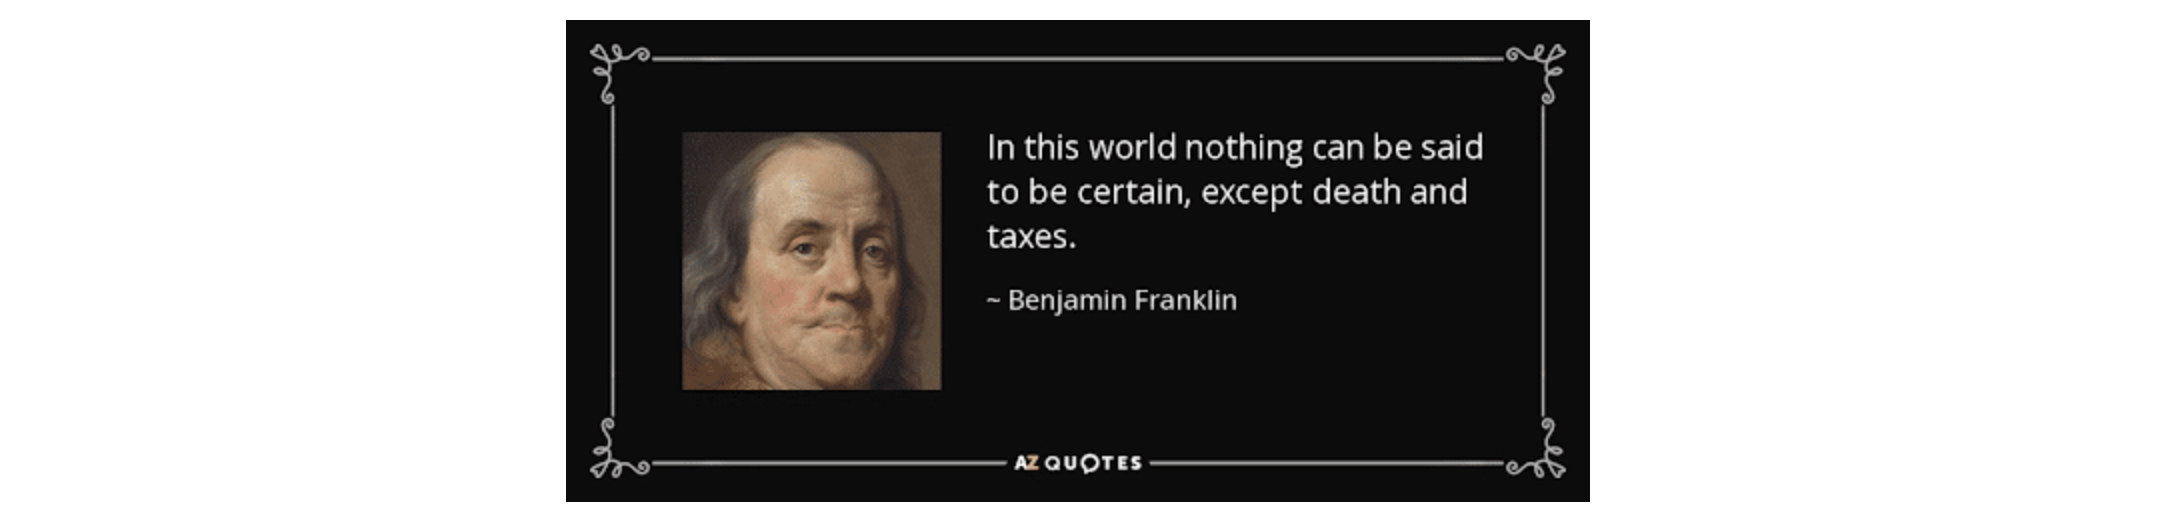

Let $X =$ the leading digit of a randomly selected number from a large accounting ledger. So, for example, if we randomly draw the number $\$20,695$, then $X = 2$. People who make up numbers to commit accounting fraud tend to give $X$ a (discrete) uniform distribution, i.e., $P(X = x) = 1/9$, for $x \in \{1,...,9\}$. However, there is empirical evidence that suggests that "naturally occurring" numbers (e.g., numbers in a non-fraudulent accounting ledger) have leading digits that do not follow a uniform distribution. Instead, they follow a distribution defined by:

\begin{align*}
f(x) = \log_{10}\bigg(\frac{x+1}{x}\bigg), \,\,\,\, x = 1,2,...,9.
\end{align*} 

Using ${\tt 2013.csv}$, a dataset containing the taxable incomes for individuals in 2013, we will decide whether this dataset is fraudulent. 



**Part A** (10/30 points):  

- Read in the datafile. The taxable income is listed in column 'A04800', so you'll want to isolate just this column from your dataframe. [Note: In the column name 'A04800", each character is a number except for the A out front.]

- Create a list that holds only the first digit of all of the taxable income entries. For example, if someone's taxable income was $56,895, then your list would have the number 5 for that entry.

- Drop all entries with a value of 0.

In [1]:
import pandas as pd

tax_data = pd.read_csv("2013.csv")

In [2]:
first_digit = list(tax_data['A04800'].apply(lambda x: int(str(x)[0])))

first_digit = [d for d in first_digit if d > 0]

**Part B** (10/30 points): Create a histogram of the data with an overlay of the suggested non-fraudulent density function $f(x)$ as well as the density function of the discrete uniform distribution over the same set of axes.

Plotting requirements: 
- Include a legend for each graphic
- Label your graph and your axes
- Your bins should start at 0.5, end at 9.5 and should have bin-width = 1

Write up a brief summary of your interpretation of what this image tells you. Specifically, do you think the data is fraudulent? Or non-fraudulent? Why or why not?

In [3]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(8,4))

def plot_against_discrete_and_known_dist(data, data_title):
    
    discrete_dist = [1/9 for _ in range(1, 10)]

    non_fraud_dist = [np.log10((x+1)/x) for x in range(1, 10)]
    
    xx = np.arange(1,10,1)
    
    mybins = np.arange(.5,10.5,1)
    ax.hist(data, bins=mybins, alpha=0.5, density=True, label=data_title)
    ax.plot(xx,discrete_dist, label="Discrete Uniform Distribution")
    ax.plot(xx,non_fraud_dist, label="Non-Fraudulent Distribution")
    ax.legend(loc="upper right")
    ax.set_xticks(np.arange(1,10,1))
    
    ax.set_xlabel("Digit")
    ax.set_ylabel("Density")
    ax.set_title("Density of Digits in %s versus Discrete Uniform and Known Non-Fraudulent Distribution" % data_title)
    plt.show()
    
plot_against_discrete_and_known_dist(first_digit, "Tax Data")

<Figure size 800x400 with 1 Axes>

The data looks non-fraudulent as the histogram fits the Non-Fraudulent distribution curve quite nicely. 

To further investigate this data, we could find expected frequencies of each digit, and compare those to the known non-fraudulent expectations, we also could use p testing which we will learn about later in the course. 

**Part C:** (10/30 points) Suppose Al Capone Junior is a very clever tax fraud specialist. He generates fake data to send to the IRS in order to cover up his tax evasion plot. To generate this data, he created a data set that stores only the first digit of the first 100 distinct powers of 2, e.g. $Y=[2, 2^2, 2^3, 2^4, \dots ]$.  

Create a list in this manner and repeat steps a) and b) for this new data set, plotting the distribution of the first digit of terms in $Y$ against $f(x)$.

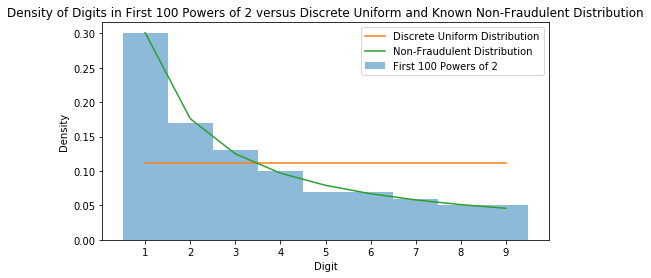

In [4]:
powers_of_2 = [int(str(2**x)[0]) for x in range(1, 101)]

fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(8,4))
plot_against_discrete_and_known_dist(powers_of_2, "First 100 Powers of 2")

Interestingly, even though Al Capone Jr.'s data was faked, the distribution of first digits fits the Non-fraudalent distribution. Hopefully the IRS has some other methods of detecting fraud!

## Problem 2 - Coins and Probability (30 points)

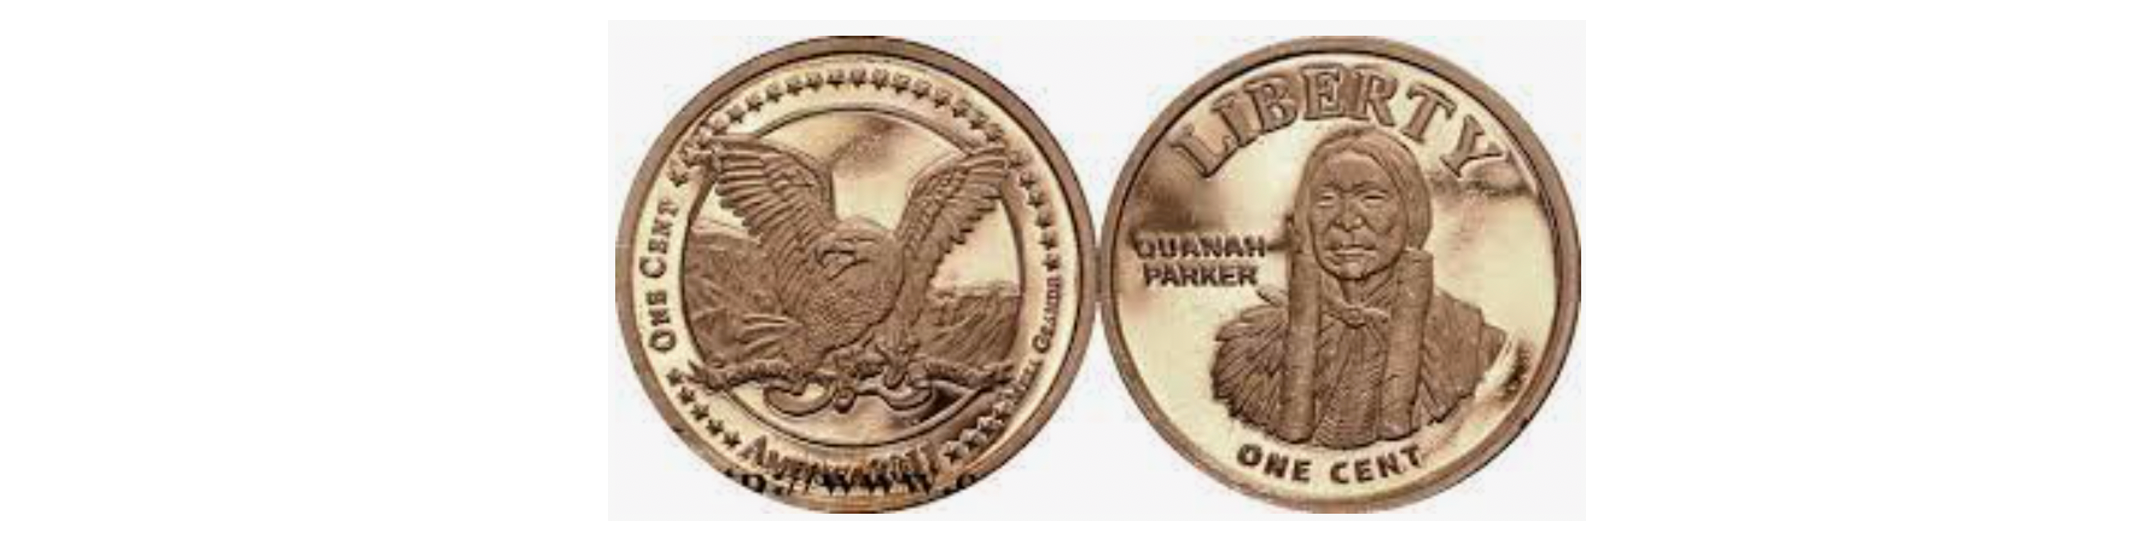

In the file `parkerflips.csv` you will find the results of an experiment that was conducted by the great-great-grandson of [Quanah Parker](https://en.wikipedia.org/wiki/Quanah_Parker), the famous Comanche chief. This is no ordinary coin, however: this coin has on one side Quanah, and on the other side Tails, as shown in the image above.

In this experiment the coin is repeatedly flipped until the Quanah side comes up. After each trial, the observed value for $X=$ the number of flips required to see the first Quanah is recorded. The results are stored in `parkerflips.csv`.

This great-great-grandson (aka Parker) has a lot of coins for performing cool data science experiments, and these coins have different biases (not all unique). Parker is easily distracted, so he isn't sure which coin he was flipping. His coins have biases of $p_Q =.2, .3, .4, .5, .6, .7$ and $.8$, where $p_Q$ is the probability of any given flip coming up Quanah.

**Part A:** (10/30 points) Read in the data set and make a frequency histogram of the data. Be sure to label your axes appropriately, and center your bins above the integer numbers of flips (0, 1, 2, etc...). 

What is the name of the distribution for the random variable that Parker observed and recorded in his data table?

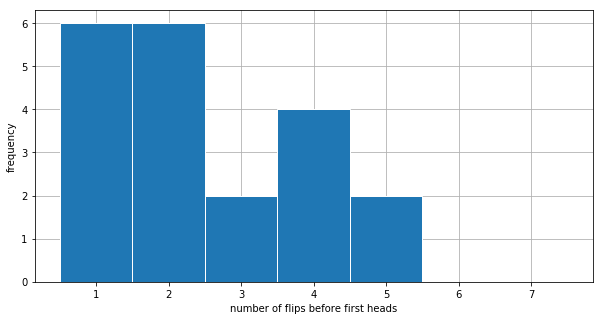

In [5]:
# SOLUTION:

dfFlips = pd.read_csv("parkerflips.csv", header=None)

my_bins = np.arange(0.5,8.5,1)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
dfFlips.hist(ax=ax, bins=my_bins, edgecolor='white')
ax.set_axisbelow(True)
ax.set_xlabel('number of flips before first heads')
ax.set_ylabel('frequency')
ax.set_title('');

Parker recorded the number of trials needed to observe the *first* success, so that is a **geometric distribution**.  

**Part B:** (10/30 points) Use the distribution that you identified in Part A to determine $P(X=n \mid p_Q=0.5)$, the probability that Parker would observe the first Quanah flip on the $n$-th flip, assuming that the coin is fair ($p_Q=0.5$). 

- Determine $P(X=n \mid p_Q=0.5)$ for ***each*** of the $n$ from his 20 trials in his data set. Print these 20 probabilities to the screen.

- Then, combine these 20 probabilities to find the overall *likelihood* that Parker would observe this particular data set, assuming that the coin was in fact fair. That is, estimate and report $P(\text{data} \mid p_Q=0.5)$. Be sure to note any assumptions you make about how the outcome of one trial relates to the outcomes of the others.

If it helps to have some mathematical notation, consider that Parker's data set consists of the results of all 20 of his trials: $$\text{data} = (X_1 = n_1) \cap (X_2 = n_2) \cap \ldots (X_{20} = n_{20})$$


In [6]:
def geometric_dist(n,p):
    prob = p*(1-p)**(n-1)
    
    return prob

for flipnum in dfFlips[0]:
    prob_observ = geometric_dist(flipnum,0.5)
    print(flipnum, prob_observ)

2 0.25
1 0.5
4 0.0625
2 0.25
2 0.25
1 0.5
5 0.03125
2 0.25
4 0.0625
1 0.5
2 0.25
1 0.5
1 0.5
4 0.0625
4 0.0625
5 0.03125
3 0.125
2 0.25
3 0.125
1 0.5


Each trial is **conditionally independent** of the others, given the bias of the coin, so we can take the product of the probabilities that we just computed to achieve a probability of observing the entire data set given a fair coin:

In [7]:
def geometric_dist(n,p):
    prob = p*(1-p)**(n-1)
    
    return prob

overall_prob = 1
for flipnum in dfFlips[0]:
    prob_observ = geometric_dist(flipnum,0.5)
    overall_prob = overall_prob*prob_observ
print(overall_prob)

8.881784197001252e-16


**Part C:** (10/30 points)
* Now, estimate the probability of each possible bias $p_Q = [.2, .3, .4, .5, .6, .7, .8, .9]$, given Parker's data. In other words find $P(p_Q \mid \text{data})$ for each different possible bias in the liist $p_Q$.  This is called the _posterior distribution_ for the coin bias, because it is our assessment of the coin's bias _after_ we have accounted for Parker's data.
* Make a scatter plot with the 8 possible biases along x-axis versus the posterior probability of that bias along the y-axis, and be sure to label your axes. Make sure to **normalize** your results. This can be done by taking each of your probability computations and dividing it by the sum of all of the computations. e.g. $x = [.1,.2,.1]$ would be $x_{norm} = [\frac{.1}{.1+.2+.1},\frac{.2}{.1+.2+.1},\frac{.1}{.1+.2+.1}]$
* Comment on your plot. What appears to be the most probable value for the bias, $p_Q$? This is called the _maximum a posteriori_ estimate, because it maximizes the posterior distribution.

**Solution**
Lets consider two different ways to approach this question.<br>
With either solution, list your assumptions and how you interpret the information. Then build on those assumptions and interpretations to describe how you are answering the query.

Method one: You are asked to compute $P(p_Q \mid data)$. This can be done by computing $P(data \mid p_Q)$ as was done in **Part B**.  Then you would need to "normalize" your results in the way defined above. This process is essentially using Bayes' Rule implicitly and making use of the assumption that $P(p_Q)$ is constant for all coin biases and that $p(data)$ will always be the same.

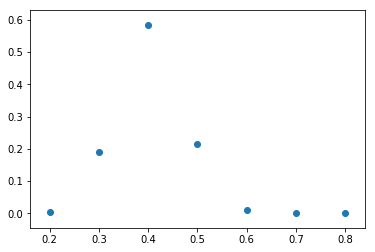

In [19]:
# FIRST SOLUTION:

def geometric_dist(n,p):
    prob = p*(1-p)**(n-1)
    
    return prob

bias = [.2,.3,.4,.5,.6,.7,.8]
   # or bias = [.2, .3, .4, .5, .6, .7, .8, .9] if you prefer

bias_probs = []

for b in bias:
    overall_prob = 1
    for flipnum in dfFlips[0]:
        prob_observ = geometric_dist(flipnum,b)
        overall_prob = overall_prob*prob_observ
    bias_probs.append(overall_prob)

# need to normalize probabilities
bias_probs = bias_probs/np.sum(bias_probs)
    
plt.scatter(bias,bias_probs)

**Solution Number Two**<br>
Consider a second method; a more explicit computation of each of the terms in Bayes rule. In part B we found $P(\text{data}|p_Q = 0.5)$, or all of the $P(X=n|p_Q=0.5)$.<br>
Now in a similar vein we are finding $P(p_Q|\text{data})$ for each $p_Q$.
In other words, $P(p_Q = 0.2|\text{data})$ and $P(p_Q = 0.3|\text{data})$ and $P(p_Q = 0.4|\text{data})$ etc.

Realize though, that by Baye's Rule we know $P(p_Q = 0.2|\text{data}) = \frac{P(\text{data}|p_Q = (0.2))P(p_Q=0.2)}{P(\text{data})}$ and $P(p_Q = 0.3|\text{data}) = \frac{P(\text{data}|p_Q = (0.3))P(p_Q=0.3)}{P(\text{data})}$, etc.


If we have equal amounts of biased coins to draw from then the Law of Total Probability (LTP) can be used to find $P(\text{data})$<br>
$P(\text{data} | p_Q = 0.2)\cdot P(p_Q = 0.2) + P(\text{data} | p_Q = 0.3)\cdot P(p_Q = 0.3) + ...$


[0.003120289887512001, 0.1889129436994503, 0.5842957920352344, 0.2134988978329495, 0.010132582957274148, 3.9490611839442605e-05, 2.975740325462314e-09]


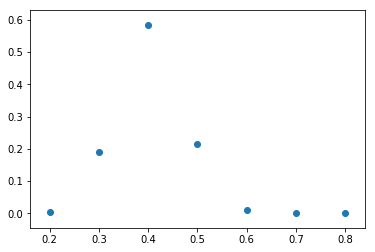

In [21]:
# Second Solution

def geometric_dist(n,p):
    prob = p * (1 - p)**(n - 1)
    return prob

bias = [.2, .3, .4, .5, .6, .7, .8]
    # of bias = [.2, .3, .4, .5, .6, .7, .8, .9] if you prefer
bias_probs = []

# This for loop finds the overall probability for each bias
for b in bias:
    overall_prob = 1
    for flipnum in dfFlips[0]:
        prob_observ = geometric_dist(flipnum, b)
        overall_prob = overall_prob*prob_observ
    bias_probs.append(overall_prob)
    
# Computation of denominator term of Bayes, using LTP
p_data = np.sum([(1/len(bias))*bp for bp in bias_probs])

# Computation of numerator term P(data | pQ)*P(pQ)
bias_probs = [(1/len(bias))*bp for bp in bias_probs]

# Final computation for Bayes rule
bias_probs = [bp/p_data for bp in bias_probs]
print(bias_probs)

# Can still normalize, but it's actually not necessary.
# The commented line below shows how you would go about normalizing.
# bias_probs = bias_probs / np.sum(bias_probs)

plt.scatter(bias, bias_probs)


***

## Problem 3 - Stochastic Simulation (20 points)

**Part A** (10/20 points): Using a stochastic simulation, compute the probability that, from a shuffled standard deck of cards, two cards are sequentially chosen (without replacement) which have either identical value or _adjacent_ value.  

- Adjacent value means that the cards only differ by 1 value. (e.g. 2 of hearts and 3 of clubs)
- You may let Aces be high or low, but not both. Your choice in how to handle the Aces will not effect the probability computation.

In [10]:
deck = list(np.arange(13))*4
n_trials = 100000
n_hits = 0
for trial in range(n_trials):
    draws = np.random.choice(deck,size=2, replace=False)
    if np.abs(draws[0]-draws[1])<2:
        n_hits += 1
print("Prob draw two cards that are within 1 of each other = {:.3f}".format(n_hits/n_trials))

Prob draw two cards that are within 1 of each other = 0.202


**Part B** (10/20 points): Using a stochastic simulation, compute the probability that, from a shuffled standard deck of cards, three cards are sequentially chosen (without replacement) which form a run, e.g. 4-5-6 or 9-10-J. (The cards do not need to be drawn in order, like 4,5,6... any order is fine, like 6,4,5.) You may let Aces be high or low, but not both.

Hint: You may find the built-in python function `.sort()` helpful. Note that a run, 4-5-6 is comprised of 4 **and** 4+1 **and** 4+2

In [11]:
deck = list(np.arange(13))*4
n_trials = 1000000
n_hits = 0
for trial in range(n_trials):
    draws = np.random.choice(deck,size=3, replace=False)
    draws.sort()
    if ((draws[0]+1)==draws[1]) and ((draws[1]+1)==draws[2]):
        n_hits += 1
partBanswer = n_hits/n_trials
print("Prob draw three cards that form a run = {:.3f}".format(n_hits/n_trials))

Prob draw three cards that form a run = 0.032
